In [149]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [150]:
with open(f'dataframes/{21}.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.757356e+09,1.757356e+09,"[89.0, 87.62, 87.47, 87.85, 87.78, 87.7, 87.78...",915,1,5
1,Tag2,Tag1,1.757356e+09,1.757356e+09,"[52.76, 56.04, 55.96, 56.04, 55.89, 56.04, 56....",915,1,5


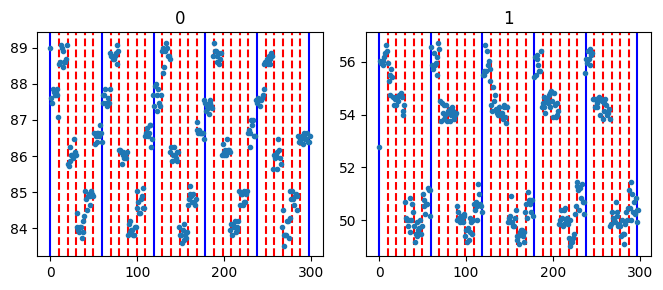

In [151]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=df.iloc[0]['NumMPPs']
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(10,3))
for df_idx in range(len(df)):

    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    bad=False
    for k in phase_medians.keys():
        assert(len(phase_medians[k])==num_mpps)
        if np.std(phase_medians[k])>1:
            print(f"Bad data found at {df_idx} df_idx at phase {k}.")
            print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.plot(voltages,'.')
        plt.title(df_idx)
        plt.tight_layout()
        
if plotting:
    plt.show()
    
    

In [152]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,"[89.0, 87.62, 87.47, 87.85, 87.78, 87.7, 87.78...","[87.78, 87.545, 87.7, 87.4, 87.58500000000001]","[88.62, 88.77, 88.845, 88.81, 88.655]","[86.02, 86.06, 86.06, 86.18, 85.985]","[84.04, 83.96, 83.81, 84.04, 84.0]","[84.88, 84.73, 84.8, 84.95, 84.88]","[86.595, 86.595, 86.63, 86.66999999999999, 86.48]",915,1,5
1,Tag2,Tag1,"[52.76, 56.04, 55.96, 56.04, 55.89, 56.04, 56....","[56.04, 55.925, 55.66, 55.775, 56.12]","[55.355000000000004, 54.21, 54.285, 54.4749999...","[54.67, 54.06, 54.06, 54.36, 54.095]","[50.05, 50.125, 50.015, 50.05, 50.05]","[49.67, 49.55, 49.4, 49.4, 49.82]","[50.695, 50.584999999999994, 50.62, 51.0049999...",915,1,5
